In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carregar dados
df = pd.read_csv("../datasets/diabetes Pima Indian heritage.csv")

#Exibir dados
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Making Pregnancies histogram graphy...
Making Glucose histogram graphy...
Making BloodPressure histogram graphy...
Making SkinThickness histogram graphy...
Making Insulin histogram graphy...
Making BMI histogram graphy...
Making DiabetesPedigreeFunction histogram graphy...
Making Age histogram graphy...
Making Outcome histogram graphy...


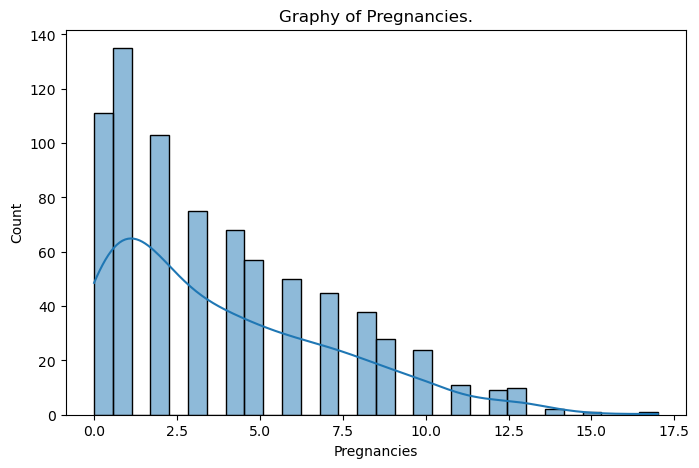

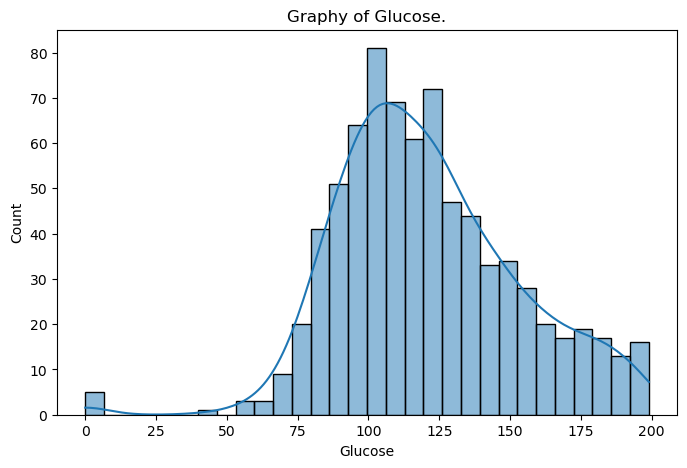

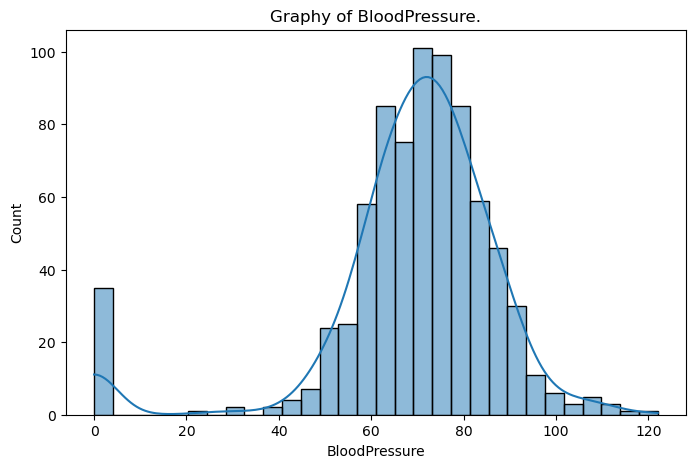

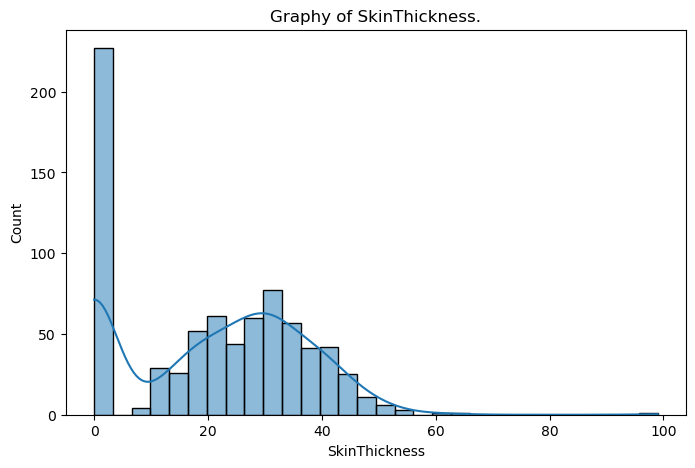

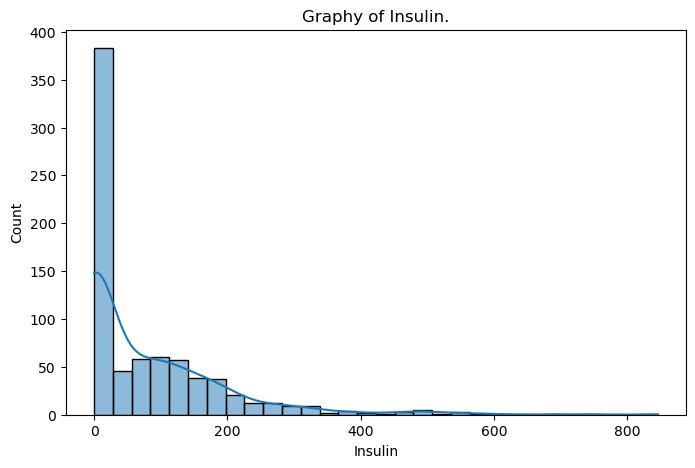

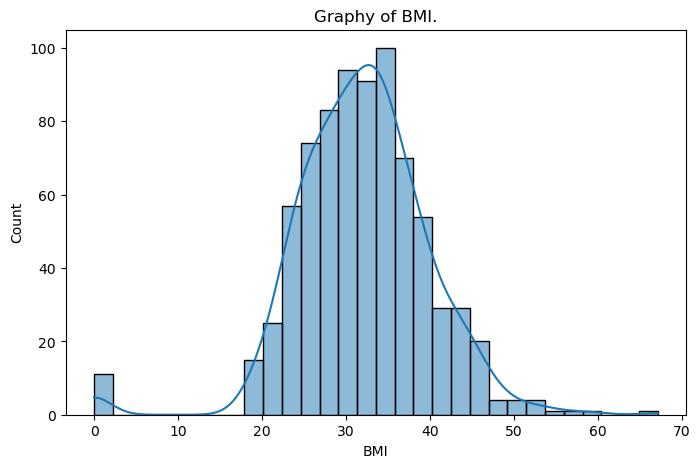

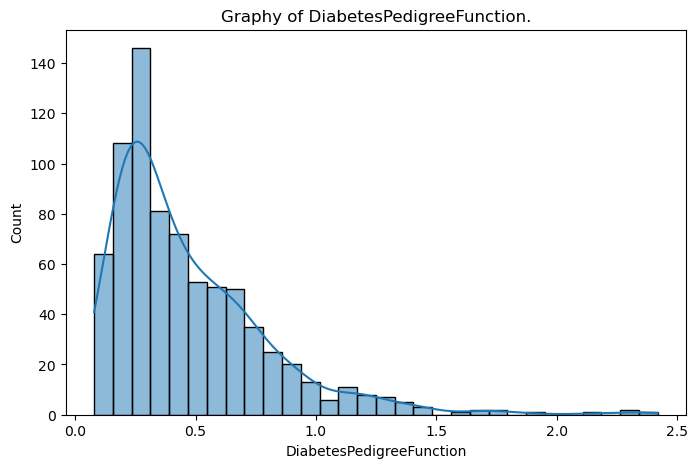

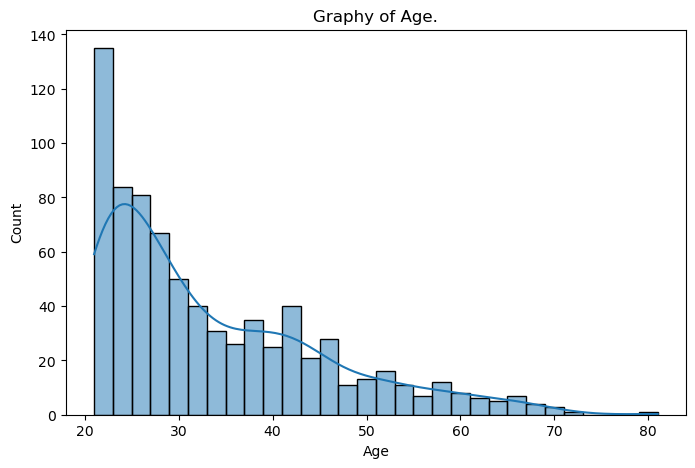

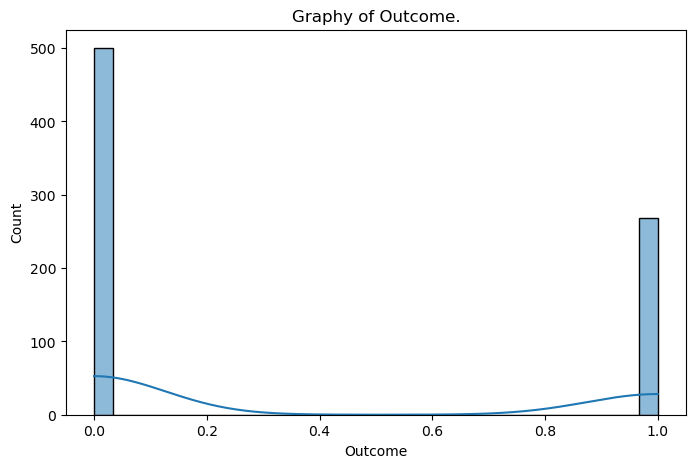

In [22]:
#Histogramas
for colum in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(x=colum, data=df, bins=30, kde=True)
    print(f"Making {colum} histogram graphy...")
    plt.title(f"Graphy of {colum}.")
    plt.show

Making Pregnancies boxplot graphy...
Making Glucose boxplot graphy...
Making BloodPressure boxplot graphy...
Making SkinThickness boxplot graphy...
Making Insulin boxplot graphy...
Making BMI boxplot graphy...
Making DiabetesPedigreeFunction boxplot graphy...
Making Age boxplot graphy...
Making Outcome boxplot graphy...


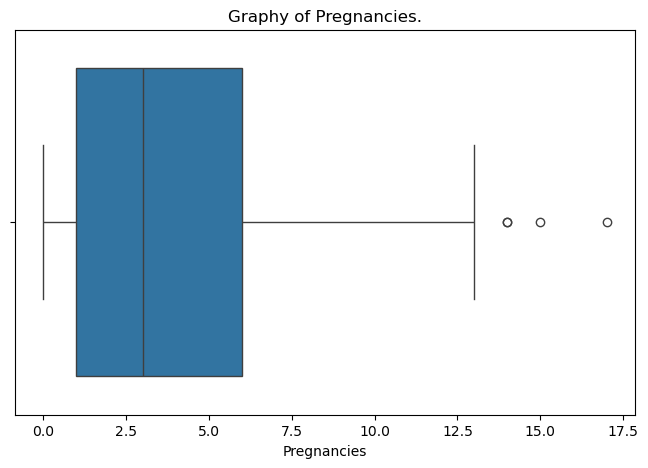

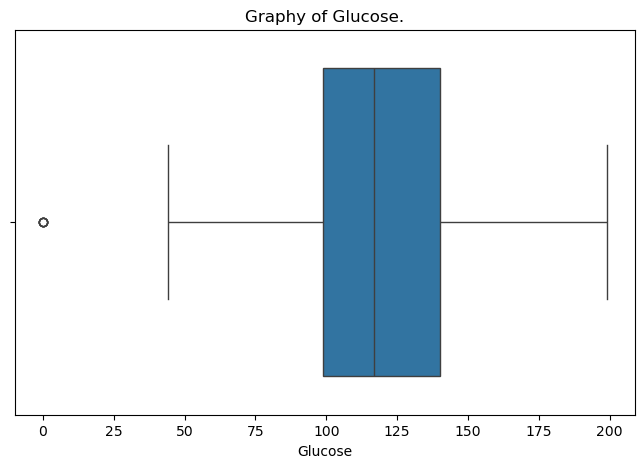

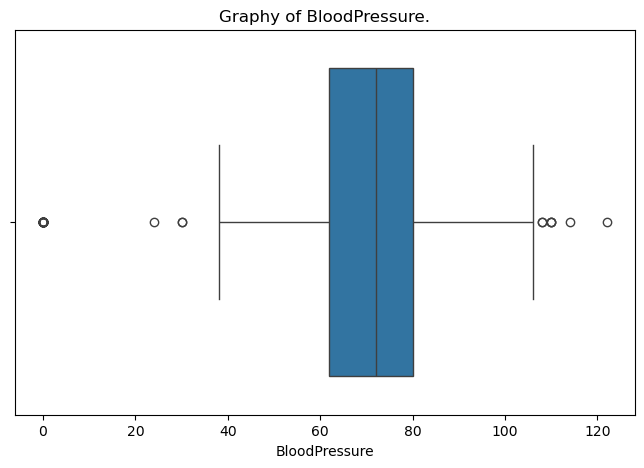

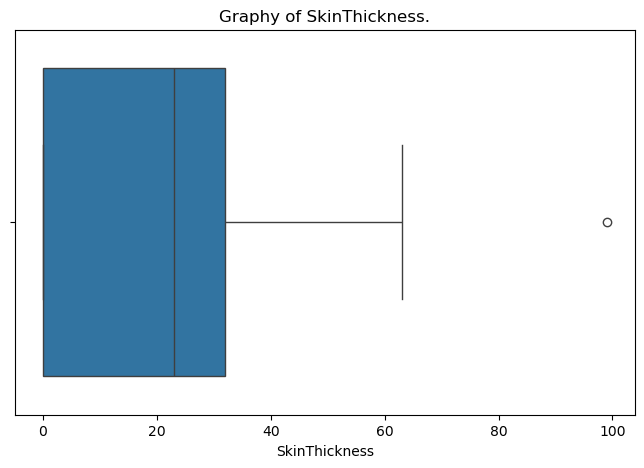

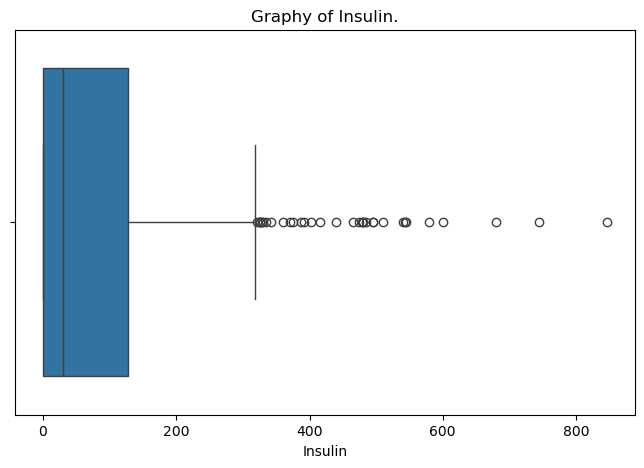

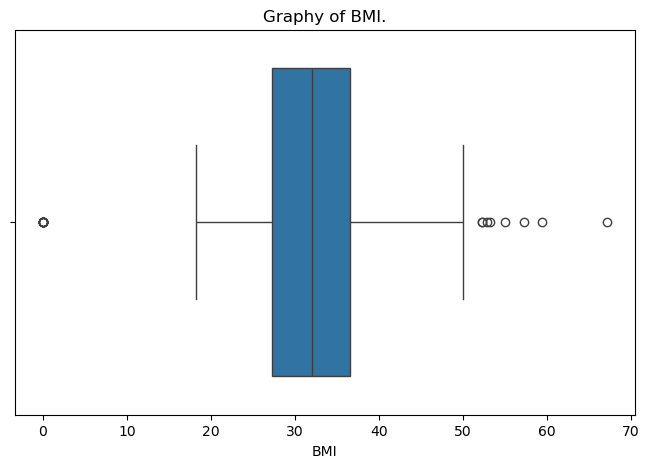

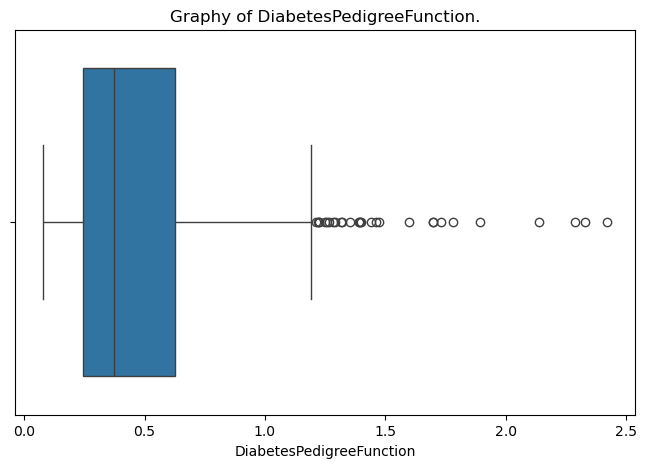

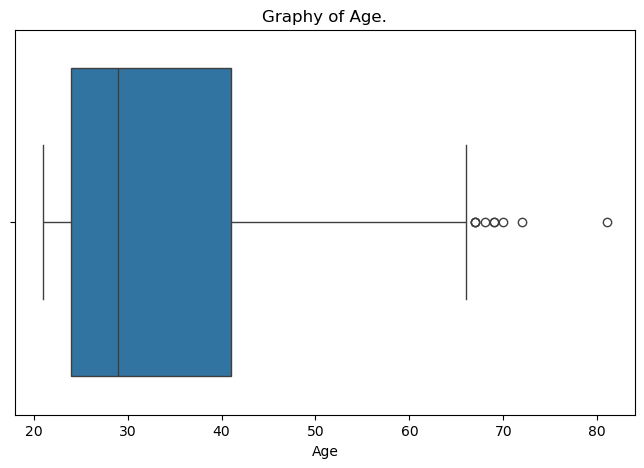

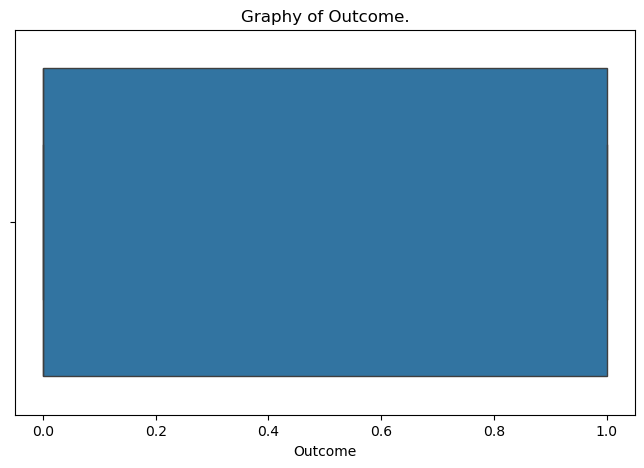

In [23]:
#Boxplots
for colum in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=colum, data=df)
    print(f"Making {colum} boxplot graphy...")
    plt.title(f"Graphy of {colum}.")
    plt.show

Making correlation graphy BMI x SKINTHICKNESS


Text(0.5, 1.0, 'Correlation grapy BMI x SkinThickness')

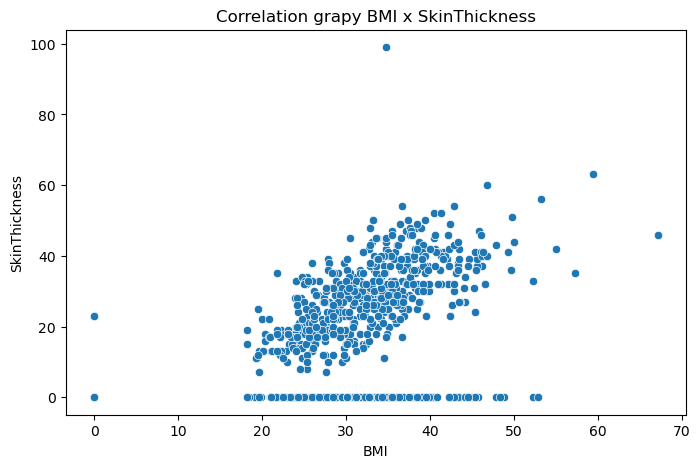

In [24]:
print("Making correlation graphy BMI x SKINTHICKNESS")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='SkinThickness', data=df,)
plt.title("Correlation grapy BMI x SkinThickness")

In [25]:
#Contar Zeros
zeros_summary = []
for column in df.columns:
    count = (df[column] == 0).sum()
    percent_zeros = (count / len(df)) * 100
    zeros_summary.append({'Coluna': column, 'Zeros (%)': percent_zeros})
df_zeros = pd.DataFrame(zeros_summary)
print(df_zeros)

                     Coluna  Zeros (%)
0               Pregnancies  14.453125
1                   Glucose   0.651042
2             BloodPressure   4.557292
3             SkinThickness  29.557292
4                   Insulin  48.697917
5                       BMI   1.432292
6  DiabetesPedigreeFunction   0.000000
7                       Age   0.000000
8                   Outcome  65.104167


In [26]:
df_processed = df.drop(columns=['SkinThickness'])
df_processed.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [27]:
columns = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']
df_processed[columns] = df_processed[columns].replace(0, np.nan)
print(df_processed.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [29]:
for colum in columns:
    mediana = df_processed[colum].median()
    df_processed[colum].fillna(mediana, inplace=True)
print("Imputation Finished!")
print(df_processed.describe())

Imputation Finished!
       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      3.845052  121.656250      72.386719  140.671875   32.455208   
std       3.369578   30.438286      12.096642   86.383060    6.875177   
min       0.000000   44.000000      24.000000   14.000000   18.200000   
25%       1.000000   99.750000      64.000000  121.500000   27.500000   
50%       3.000000  117.000000      72.000000  125.000000   32.300000   
75%       6.000000  140.250000      80.000000  127.250000   36.600000   
max      17.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750

C:\Users\zvito\AppData\Local\Temp\ipykernel_5700\1005820304.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[colum].fillna(mediana, inplace=True)


Making Glucose histogram processed graphy...
Making Glucose histogram graphy...
Making BloodPressure histogram processed graphy...
Making BloodPressure histogram graphy...
Making Insulin histogram processed graphy...
Making Insulin histogram graphy...
Making BMI histogram processed graphy...
Making BMI histogram graphy...


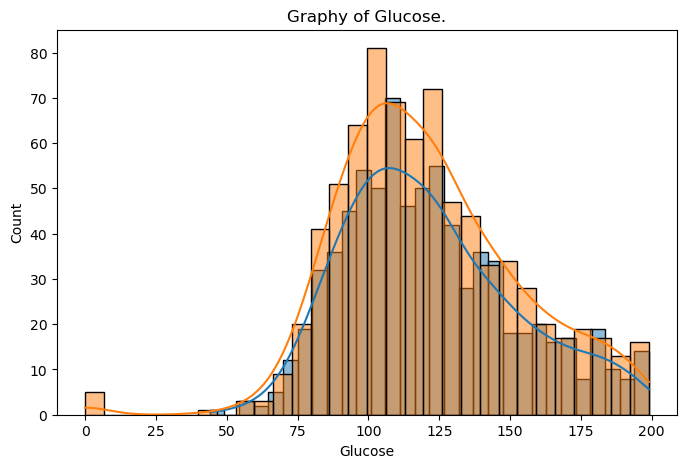

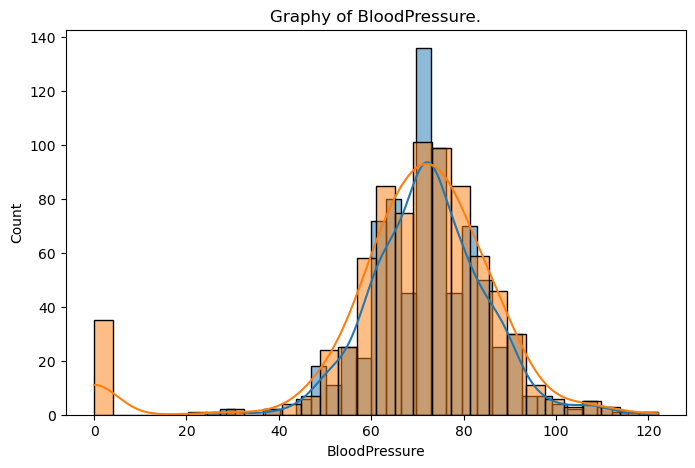

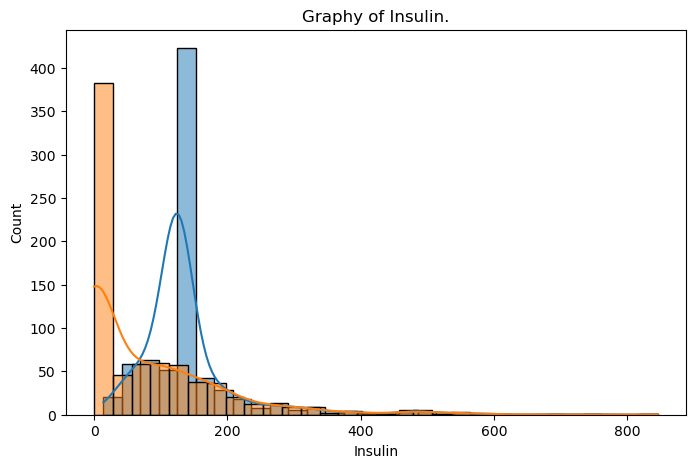

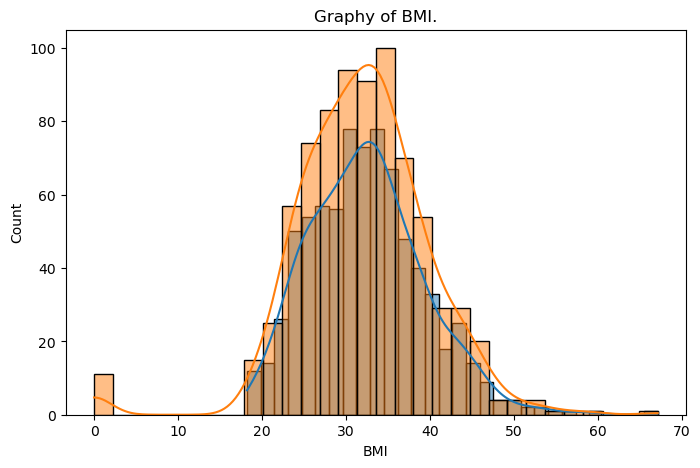

In [33]:
for colum in columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(x=colum, data=df_processed, bins=30, kde=True)
    print(f"Making {colum} histogram processed graphy...")
    plt.title(f"Graphy of {colum}.")
    plt.show
    sns.histplot(x=colum, data=df, bins=30, kde=True)
    print(f"Making {colum} histogram graphy...")
    plt.title(f"Graphy of {colum}.")
    plt.show